In [36]:
# Import packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [37]:
# Adjust default matplotlib settings
plt.style.use('tableau-colorblind10')
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.titlepad'] = 10
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['font.family'] = 'sans-serif'

### 1. Average Salary per Role

In [41]:
# Read csv
df_avg_salaries = pd.read_csv('./data/1_avg_salary_per_role.csv')

In [42]:
# Create new column to display salary in 1000s
df_avg_salaries['avg_yearly_salary_1000'] = df_avg_salaries['avg_yearly_salary'] / 1000

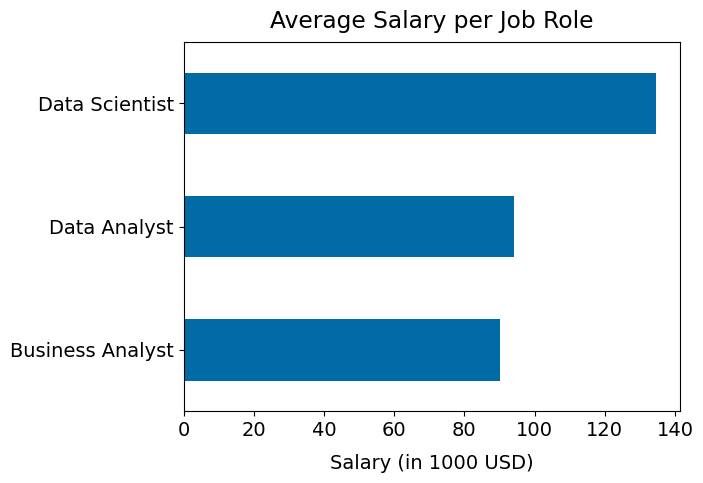

In [43]:
# Plot
df_avg_salaries.plot(x='job_title_short', y='avg_yearly_salary_1000', kind='barh',
                     xlabel='Salary (in 1000 USD)', ylabel='', legend='',
                     title='Average Salary per Job Role');

### 2. Top Skills per Role

In [44]:
# Read data
df_skills_per_role = pd.read_csv('./data/2_skills_per_role.csv')

In [64]:
# Group df by job_title and find 5 most common jobs
df_plot = df_skills_per_role.groupby('job_title_short') \
    .apply(lambda x: x.nlargest(5, 'post_count'), include_groups=False) \
    .reset_index(drop=False) \
    .drop('level_1', axis=1)

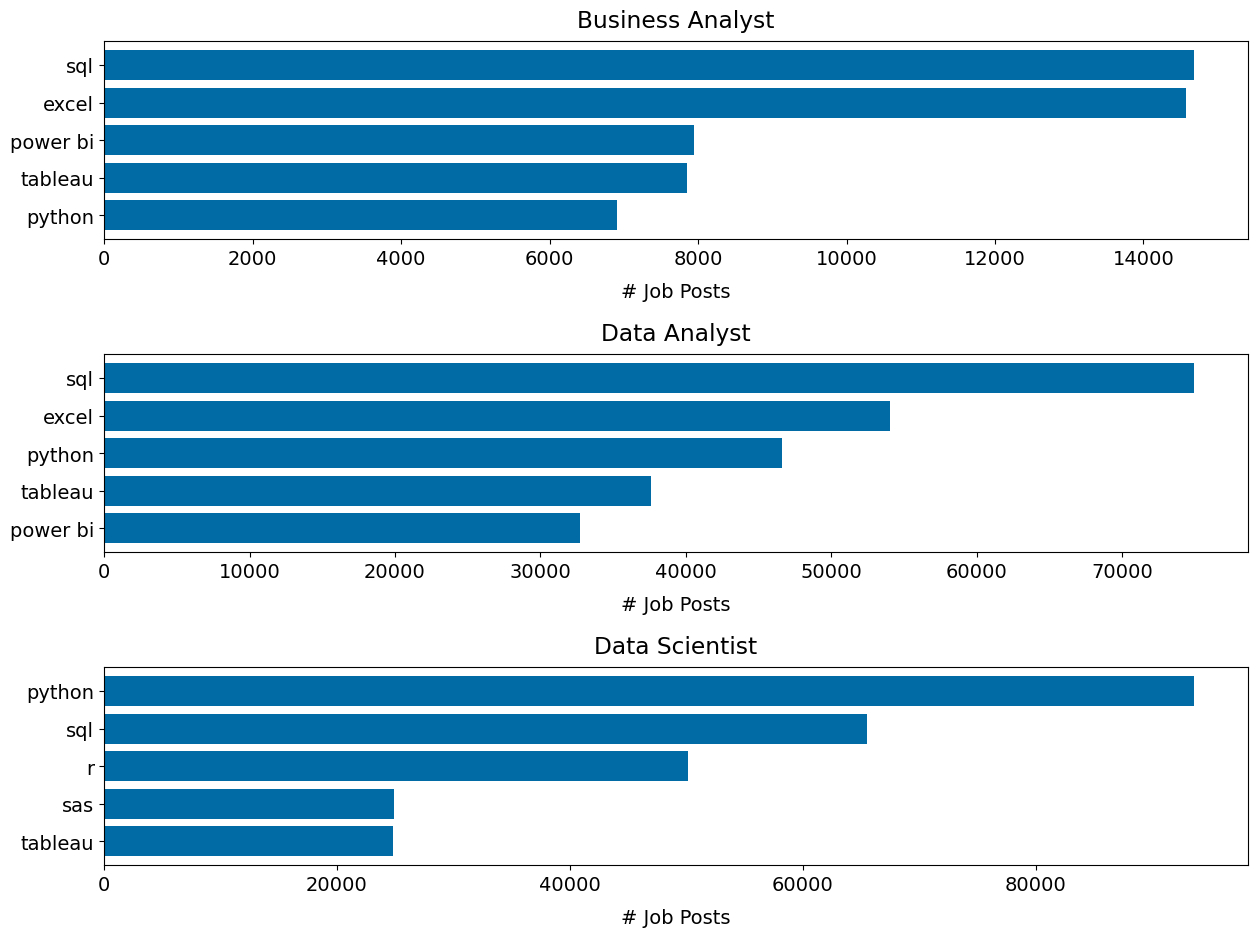

In [106]:
_, axes = plt.subplots(3, 1)
for i, j in enumerate(df_plot['job_title_short'].unique()):
    temp = df_plot[df_plot['job_title_short'] == j] \
            .sort_values(by='post_count', ascending=True)
    axes[i].barh(temp['skills'], temp['post_count'])
    axes[i].set_title(j)
    axes[i].set_xlabel('# Job Posts')
plt.tight_layout(rect=[-1, -1, 1, 1]);